# Airbnb Choice Analysis: Customers and Hosts


## Table of Contents
- [Introduction](#introduction)
- [Data Loading](#data-loading)
- [Listings](#listings)
- [Reviews](#reviews)
- [Calendar](#calendar)
- [Neighbourhoods](#neighbourhoods)
- [Events](#events)
- [Conclusion](#conclusion)
- [Next Steps/Recommendations](#next-steps/recommendations)
- [References and AI Use](#references-and-ai-use)

## Introduction

Airbnb was founded in 2008 and since then it has changed the travel and hospitality industry around the world greatly. Airbnb offers short-term rentals as opposed to traditional hotels by being pocket-friendly for those looking for accommodations and allowing house owners to rent out their properties to guests. 
In a city like Toronto, which Boyd (2024) estimates will have 8.95 million visitors in 2023, Airbnb is a major influence on the housing market and the visitor experience. Airbnb offers  alot of possibilities to tourists and other clients, enabling homeowners to optimize their profits through clever placement of their apartments. Comprehending the elements that impact client happiness and long-term performance is crucial for both visitors wanting exceptional experiences and hosts hoping to maximize their profits.
In this project, we are analyzing Toronto Airbnb listings, reviews, and availability data to help Airbnb customers get value for their money and to help Airbnb hosts improve customer experiences, and by inference, maximize profit. 

### Motivation

This project's motivation stems from our curiosity about how Airbnb listings in a lively city like Toronto can tell the story of customer experiences, host behaviors, pricing strategies, and the impact of local festivals on the overall demand and pricing of Airbnb.

_It has become important to mention that we are not being sponsored by Airbnb for this project._

### Datasets

The datasets for our project were retrieved from Inside Airbnb, a mission-driven initiative that provides data and advocacy about Airbnb's impact on residential communities (Airbnb, n.d.-a). Their data is licensed under a Creative Commons Attribution 4.0 International License (Airbnb, n.d.-b). This License allows others to share, copy, redistribute, adapt, and build upon the material for any purpose, including commercial use, when proper credit is given (Creative Commons, n.d.). 

We will analyze multiple datasets to assess the Airbnb market in Toronto, Ontario, Canada. The datasets, generated quarterly over the past 12 months, are in CSV format, making them easy to process using Python. At the time of this proposal, Inside Airbnb last scraped the datasets from the Airbnb website on the 5th of September 2024, compiling listings and reviews as of that date. As a result, we have data on calendar availability and pricing from September 2024 to September 2025.

The key datasets for this analysis include:

**Detailed_listings.csv:** Contains information about each Airbnb listing, including amenities, location, property type, et cetera. It has 21,825 rows and 75 columns.
Out of 75 columns, we have mainly used columns i.e. id, price, host_acceptance_rate, host_response_rate, amenities, beds, bedrooms, bathrooms, room_types, neighbourhood_cleansed, review_scores_rating

**Detailed_reviews.csv:**  Includes guest reviews, review dates, et cetera. It has 573,077 rows and 6 columns which are listing_id, id , date, reviewer_id, reviewer_name, comments.

**Neigbourhoods.csv:** Provides a list of neighborhoods. It has 140 rows and 2 columns i.e. neighbourhood_group, neighbourhood.

**Calendar.csv:** Provides information on Airbnb pricing and availability over one year.  It has 7,966,127 rows and 7 columns from which we utilised listing_id, date, available, price, minimum_nights, maximum_nights

**Events.csv:** Provides information on specific dates for each event and how these dates correlate with Airbnb demand and pricing. It has 52 rows and 4 columns i.e. event, date_started, date_ended, comments.


### Guiding Questions

Our guiding questions revolve around:

1. **What neighbourhoods in Toronto offer the best value for money in terms of price and review score?**

    This question is about finding out which neighbourhoods in Toronto offer the best balance between cost and customer ratings. Both price and reviews are very important when people choose Airbnb. According to Inside Airbnb, these factors are key in deciding how happy guests are with their stay (Inside Airbnb, 2023). The answer will help understand which neighbourhood has a better match between price and review scores, providing a valuable suggestion for future customers.

2. **What is the trade-off between price, amenities, and customer satisfaction in Airbnb listings?**

    This question looks at how price, amenities, and customer satisfaction are connected. For Airbnb hosts, it's important to know what amenities make the price worth it. Airbnb’s blog mentions that things like Wi-Fi, parking, and a kitchen can affect how happy guests are (Airbnb News, 2023). For example, if a host wants to charge $200 per night, what amenities should be included? Answering this can help hosts decide how to price their listing and which amenities to offer.

3. **Is there a relationship between the number of listings a host has and their reviews?**

    It helps to identify whether hosts can manage all their listings without affecting service quality, whether the host with more experience may attract more guests, and how scaling up impacts guest satisfaction. It is important as it provides insights into how Airbnb can create a better support system and identify best practices.

4. **As a business owner, what attributes do customers value the most, based on reviews?**

    This question allows hosts to know what amenities customers prefer when looking for an Airbnb. With this, they can invest in a place where they can provide maximum amenities for improved customer experience. This is important as there is high competition in the market with multiple options to choose from.

5. **Are there any seasonal trends in the number of customer reviews on Airbnb?**

    This can help Airbnb understand the best times to encourage customers to write reviews. If we find patterns, Airbnb can use this information to send out reminders to guests to leave a review during the right times. With this answer, Airbnb can choose the best times to invite guests to write reviews, improving the number of reviews on the platform.

6. **How do local festivals and events in Toronto impact Airbnb demand and pricing trends?**

    We will use additional data on annual events in Toronto and compare them with the dates of Airbnb listings and calendar data to see if we can draw any meaningful correlations between demand, pricing or availability around these festivals
In the course of our exploration, our questions have definitely evolved with interesting findings and a few roadblocks. Each team member worked on cleaning and exploring separate tables in our dataset (listings, reviews, calendar, neighborhood, and events), eventually coming together to discuss results and find connections between our findings. We will discuss these tables consecutively. In the sections for the data tables, we will discuss the following aspects: inspection, cleaning, and exploratory data analysis (EDA).y.

## Data Loading

First, we pip install the libraries we need in case they are not present in the environment. Next, we import these libraries into the Jupyter notebook with comments beside these libraries to explain their usage. Finally we load the data into pandas dataframes.

In [1]:
# pip install required modules
%pip install nltk
%pip install deep-translator==1.11.4
%pip install matplotlib
%pip install wordcloud
%pip install seaborn
%pip install pandas
%pip install numpy
%pip install gdown

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import required modules
from nltk.sentiment import SentimentIntensityAnalyzer # for sentiment analysis
from deep_translator import GoogleTranslator # for translation services
from collections import Counter # to count frequencies in dictionaries
import matplotlib.pyplot as plt
from wordcloud import WordCloud # for unstructured text visualization
from time import sleep  # for a short delay
import seaborn as sb
import pandas as pd
import numpy as np
import calendar # for date analysis
import IPython # to restart kernel
import nltk # for unstructured text analysis
import gdown # for downloading data from google drive
import ast # for type conversions
import re # for regex
import os

# download stopwords from nltk to get a list of English stopwords
nltk.download('stopwords')
# download VADER for sentiment analysis
nltk.download('vader_lexicon')

# import stopwords after download
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Function to restart kernel after pip install
def restart_kernel():
    print("Restarting kernel...")
    # Send a command to restart the kernel
    IPython.display.display(IPython.display.Javascript("Jupyter.notebook.kernel.restart()"))
    
    # Wait for the kernel to restart
    kernel_restarting = True
    while kernel_restarting:
        try:
            # Try executing some Python code to check if the kernel has restarted
            sleep(3)  # Wait a few seconds
            _ = os.getpid()  # Check if kernel is responding
            kernel_restarting = False  # If this executes, the kernel is back
        except:
            # If there's an error, the kernel hasn't restarted yet
            kernel_restarting = True

    print("Kernel restarted successfully!")

# Call the function
restart_kernel()

Restarting kernel...


<IPython.core.display.Javascript object>

Kernel restarted successfully!


In [4]:
# file ids from Google Drive links
# here is a sample GDrive link: https://drive.google.com/file/d/1234abcde/view?usp=drive_link
# the file id is the second to the last substring after splitting by '/'; in the above example 1234abcde
listings_file = '1WxjQn1OtNAWKIhgVSX16bABJf8fBNBCo'
reviews_file = '1ttiGhh6CyL4IG1bwswrXKLJL8D48dp1r'
calendar_file = '1TGQW2efwRHjImuJSO5q1Rtb-955aNrCL'
neighbourhoods_file = '1cDu64bHN4j0mhYBLHzbREj9guQrg7RGe'
events_file = '1YCgSoY9XBzkb6XW--baISYTvHyvqlxgL'

In [5]:
# download the files from Google Drive if not already in directory
if not os.path.exists('detailed_listings.csv'):
    gdown.download(url=f'https://drive.google.com/uc?id={listings_file}', output='detailed_listings.csv')
else:
    print('Listings file already exists')

if not os.path.exists('detailed_reviews.csv'):
    gdown.download(url=f'https://drive.google.com/uc?id={reviews_file}', output='detailed_reviews.csv')
else:
    print('Reviews file already exists')

if not os.path.exists('calendar.csv'):
    gdown.download(url=f'https://drive.google.com/uc?id={calendar_file}', output='calendar.csv')
else:
    print('Calendar file already exists')

if not os.path.exists('neighbourhoods.csv'):
    gdown.download(url=f'https://drive.google.com/uc?id={neighbourhoods_file}', output='neighbourhoods.csv')
else:
    print('Neighborhoods file already exists')

if not os.path.exists('events.csv'):
    gdown.download(url=f'https://drive.google.com/uc?id={events_file}', output='events.csv')
else:
    print('Events file already exists')

Downloading...
From (original): https://drive.google.com/uc?id=1WxjQn1OtNAWKIhgVSX16bABJf8fBNBCo
From (redirected): https://drive.google.com/uc?id=1WxjQn1OtNAWKIhgVSX16bABJf8fBNBCo&confirm=t&uuid=889b6400-0440-4464-a905-c8707f1c1d2a
To: c:\Users\user\OneDrive\OneDrive - University of Calgary\Documents\Classes\DATA 601\GroupProject\GitHub\DATA601Project\detailed_listings.csv
100%|██████████| 48.8M/48.8M [00:02<00:00, 16.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1ttiGhh6CyL4IG1bwswrXKLJL8D48dp1r
From (redirected): https://drive.google.com/uc?id=1ttiGhh6CyL4IG1bwswrXKLJL8D48dp1r&confirm=t&uuid=c1e3540e-4d24-4fee-9b84-23730da9113b
To: c:\Users\user\OneDrive\OneDrive - University of Calgary\Documents\Classes\DATA 601\GroupProject\GitHub\DATA601Project\detailed_reviews.csv
100%|██████████| 159M/159M [00:08<00:00, 19.0MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1TGQW2efwRHjImuJSO5q1Rtb-955aNrCL
From (redirected): https://drive.google.com/u

In [6]:
# read the csv files
listings_df = pd.read_csv('detailed_listings.csv')
reviews_df = pd.read_csv('detailed_reviews.csv')
calendar_df = pd.read_csv('calendar.csv')
neighborhoods_df = pd.read_csv('neighbourhoods.csv')
events_df = pd.read_csv('events.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_5056\3302665479.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar_df = pd.read_csv('calendar.csv')


In [7]:
# set random seed
seed = 42

## Listings

Contents covered:

    - Data Inspection
    - Data Cleaning 
    - EDA and Answering Relevant Guiding Questions
    

### Data Inspection

To get a clearer idea of our Listings dataset, we took a random sample of 5 rows. This gave us a clearer picture of how the listings dataset looks.

In [8]:
# randomly sample 5 rows
listings_df.sample(5, random_state=seed)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
21634,1231418676495170678,https://www.airbnb.com/rooms/1231418676495170678,20240905175005,2024-09-06,city scrape,"Private bedroom, bathroom & shared pool",Experience the blend of classic charm and mode...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,144943031,...,NaN,NaN,NaN,STR-2311-HLMPHX,f,2,0,2,0,NaN
20686,1202022216159261907,https://www.airbnb.com/rooms/1202022216159261907,20240905175005,2024-09-06,city scrape,Modern Downtown Corner unit with Parking spot,Overlooking Maple Leaf Square / Jurassic Park ...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,122022939,...,5.0,5.00,5.00,STR-2408-FTKSBQ,f,1,1,0,0,1.00
14479,932471122204247063,https://www.airbnb.com/rooms/932471122204247063,20240905175005,2024-09-06,city scrape,Entire Unique Toronto Apartment - 3 Bedrooms,"Walk into this fabulous apartment, greeted by ...",Walk the quiet back residential roads to see s...,https://a0.muscache.com/pictures/miso/Hosting-...,33738826,...,5.0,4.89,4.78,STR-2302-HBLXVW,f,3,1,2,0,0.66
1807,12103273,https://www.airbnb.com/rooms/12103273,20240905175005,2024-09-06,city scrape,Lovely 2 BR apartment on Roncesvalles / High Park,Huge 2 bedroom apartment in the heart of Ronce...,Unbeatable neighborhood. Roncesvalles village ...,https://a0.muscache.com/pictures/b2c61cec-18db...,56115395,...,5.0,5.00,4.40,STR-2205-HDZPHJ,f,1,1,0,0,0.10
20348,1191469149430482988,https://www.airbnb.com/rooms/1191469149430482988,20240905175005,2024-09-06,city scrape,1B/1BA Classical Renaissance,You will enjoy your own apartment within a Vic...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,583878781,...,NaN,NaN,NaN,NaN,f,6,2,4,0,NaN


#### Listing Dataset Summary

We used the info() function to get the summary of our dataset. This helped us understand the data types, the presence of null values, and the information of columns and rows in the dataset.




In [9]:
# dataframe summary
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21825 entries, 0 to 21824
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            21825 non-null  int64  
 1   listing_url                                   21825 non-null  object 
 2   scrape_id                                     21825 non-null  int64  
 3   last_scraped                                  21825 non-null  object 
 4   source                                        21825 non-null  object 
 5   name                                          21825 non-null  object 
 6   description                                   21316 non-null  object 
 7   neighborhood_overview                         10759 non-null  object 
 8   picture_url                                   21825 non-null  object 
 9   host_id                                       21825 non-null 

We can now see the number of rows and columns we have: 21825 rows and 75 columns. 

Moreover, we can see that our dataset comprises a combination of integers, floats, and objects.



In [10]:
# summary statistics
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.182500e+04,2.182500e+04,2.182500e+04,21823.000000,21823.000000,0.0,21825.000000,21825.000000,21825.000000,16524.000000,...,16608.000000,16608.000000,16608.000000,16607.00000,16608.000000,21825.000000,21825.000000,21825.000000,21825.000000,16610.000000
mean,5.509916e+17,2.024091e+13,2.205598e+08,8.184301,12.310911,NaN,43.685628,-79.397571,3.140527,1.284677,...,4.740737,4.854171,4.867373,4.83427,4.697543,5.319450,3.058373,2.226942,0.034135,1.443187
std,5.002248e+17,0.000000e+00,2.012549e+08,30.891709,43.502326,NaN,0.050598,0.072185,1.982419,0.595728,...,0.416063,0.323451,0.332694,0.28471,0.412523,13.081151,10.695005,7.696268,0.374790,1.812058
min,1.419000e+03,2.024091e+13,1.565000e+03,1.000000,1.000000,NaN,43.585750,-79.623950,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.213635e+07,2.024091e+13,3.697962e+07,1.000000,1.000000,NaN,43.646699,-79.430810,2.000000,1.000000,...,4.670000,4.830000,4.870000,4.78000,4.620000,1.000000,0.000000,0.000000,0.000000,0.210000
50%,7.103590e+17,2.024091e+13,1.484487e+08,2.000000,3.000000,NaN,43.666213,-79.397570,2.000000,1.000000,...,4.870000,4.960000,4.980000,4.92000,4.800000,1.000000,1.000000,0.000000,0.000000,0.700000
75%,1.031831e+18,2.024091e+13,4.242238e+08,4.000000,7.000000,NaN,43.715050,-79.372011,4.000000,1.500000,...,5.000000,5.000000,5.000000,5.00000,4.950000,3.000000,1.000000,2.000000,0.000000,2.080000
max,1.238623e+18,2.024091e+13,6.500555e+08,484.000000,619.000000,NaN,43.837740,-79.126220,16.000000,8.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,101.000000,101.000000,92.000000,8.000000,15.480000


**Numeric Datatype Summary:**
Here, we are finding the mean, standard deviation, minimum and maximum, and percentiles of all our numeric variables. 

In [11]:
# summary statistics 2
listings_df.describe(include='O')

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,21825,21825,21825,21825,21316,10759,21825,21825,21823,21823,...,21825,21810,21825,16536,20774,21825,16610,16610,10730,21825
unique,21825,3,2,21161,18912,8985,21150,14429,7178,4363,...,3,27,20761,806,2,3,3269,2182,8068,2
top,https://www.airbnb.com/rooms/1238622881503213641,2024-09-06,city scrape,CB-1 Luxury Studio + Parking,You'll have a great time at this comfortable p...,Everything your heart desires is just around t...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/785826,David,2011-07-06,...,Entire home/apt,1 bath,"[""Wifi"", ""Essentials"", ""Host greets you"", ""Lon...",$100.00,t,2024-09-06,2024-08-05,2024-09-02,Exempt,f
freq,1,17656,16536,33,112,86,33,101,148,101,...,14120,11030,48,317,20753,17656,81,669,165,17683


In [12]:
# check for duplicate rows
listings_df.duplicated().sum()

np.int64(0)

In [13]:
# check for duplicate ids
listings_df.duplicated('id').sum()

np.int64(0)

### Data Cleaning

In [14]:
# first create a copy of the dataframe
listings_df_clean = listings_df.copy()

#### 1. Converting id columns to strings

The ID columns in our dataset were originally numeric values. The purpose of ID columns was to serve as unique identifiers only and were not needed in calculations (mathematical analysis such as mean, median, quantiles, etc.) or show any kind of relationship between the numbers. We converted them to strings. This conversion treats them as categorical variables and preserves their roles as identifiers without implying any inadvertent mathematical importance. 

In [15]:
# convert id columns to string datatypes
id_columns = [col for col in listings_df_clean.columns if 'id' in col]
listings_df_clean[id_columns] = listings_df_clean[id_columns].astype(str)

In [16]:
# test
listings_df_clean[id_columns].dtypes

id                        object
scrape_id                 object
host_id                   object
host_identity_verified    object
dtype: object

#### 2. Converting price, host_acceptance_rate, and host_response_rate column to Numeric
For Data Analysis we wanted to make sure that the columns were in the correct format to perform numerical analysis. In the Listings dataset, the price column contains non-numeric characters such as dollar signs and commas. As we needed to analyze price numerically we removed the non-numeric characters and converted it to a float datatype.
Similarly, the host acceptance and response rate columns also contained percentage signs which we removed before converting them to numeric columns
With these changes we were able to ensure that we could perform accurate calculations and analysis and derive insightful results.

In [17]:
# before
listings_df_clean[['price', 'host_acceptance_rate', 'host_response_rate']].dtypes

price                   object
host_acceptance_rate    object
host_response_rate      object
dtype: object

In [18]:
# convert price, host acceptance and response rate
listings_df_clean['price'] = listings_df_clean['price'].str.replace('[$,]', '', regex=True).astype(float)
listings_df_clean['host_acceptance_rate'] = listings_df_clean['host_acceptance_rate'].str.replace('%', '').astype(float)
listings_df_clean['host_response_rate'] = listings_df_clean['host_response_rate'].str.replace('%', '').astype(float)

In [19]:
# test
listings_df_clean[['price', 'host_acceptance_rate', 'host_response_rate']].dtypes

price                   float64
host_acceptance_rate    float64
host_response_rate      float64
dtype: object

#### 3. Null Handling
We handled nulls for the following columns:

**Price:** We filled the null values with the median price per neighborhood. We believe this is a reasonable approach because the median price per neighborhood is a good representation of the typical price ranges since upper-class, middle-class and loweer-class neighborhoods generally have different prices and standards of living.

**Description:** This column tells us about the property. We filled nulls with a placeholder called "No description available".

**Beds, bedrooms, and bathrooms:** The room type can give us information about this because the bigger the room, the more beds, bedrooms, and bathrooms will be in that listing. As such, we filled the null values with the median number of beds,  bedrooms, and bathrooms per room type.

In [20]:
# before
print('Number of null values') 
listings_df_clean[['description', 'price', 'beds', 'bedrooms', 'bathrooms']].isna().sum()

Number of null values


description     509
price          5289
beds           5306
bedrooms       1640
bathrooms      5301
dtype: int64

In [21]:
# create medians for filling nulls
listing_neighborhood_price_median = listings_df_clean.groupby('neighbourhood_cleansed')['price'].transform('median')
listing_roomtype_beds_median = listings_df_clean.groupby('room_type')['beds'].transform('median')
listing_roomtype_bedrooms_median = listings_df_clean.groupby('room_type')['bedrooms'].transform('median')
listing_roomtype_bathrooms_median = listings_df_clean.groupby('room_type')['bathrooms'].transform('median')

In [22]:
# fill nulls
listings_df_clean['description'] = listings_df_clean['description'].fillna('No description available')
listings_df_clean['price'] = listings_df_clean['price'].fillna(listing_neighborhood_price_median)
listings_df_clean['beds'] = listings_df_clean['beds'].fillna(listing_roomtype_beds_median)
listings_df_clean['bedrooms'] = listings_df_clean['bedrooms'].fillna(listing_roomtype_bedrooms_median)
listings_df_clean['bathrooms'] = listings_df_clean['bathrooms'].fillna(listing_roomtype_bathrooms_median)

In [23]:
# test
print('Number of null values') 
listings_df_clean[['description', 'price', 'beds', 'bedrooms', 'bathrooms']].isna().sum()

Number of null values


description    0
price          0
beds           0
bedrooms       0
bathrooms      0
dtype: int64

### 4. Amenities Data Quality

#### **Roadblock:**

**A roadblock we encountered was in completely cleaning the amenities column to remove instances of multiple values repeated in various ways, for example, WiFi, Wifi - 42 Mbps, etc.**

In order to deal with this problem, we took a systematic approach: 

1. converted all strings to lowercase to make sure there was consistency in the data
2. transformed the column into lists which made it possible to work with individual amenities more efficiently
3. removed common stopwords so that the key terms could be emphasized that actually represented the amenities
4. we then created a dictionary of the remaining amenities and this helped us in generating a word cloud highlighting the most recurrent features and to count how many amenities for each listing.

However, we still have  to figure out how to remove the instances of multiple values repeated in various ways.



In [24]:
# create a set of English stopwords
stop_words = set(stopwords.words('english'))

In [25]:
# convert all strings to lower case
# convert the column into a list
# remove stopwords from the list
listings_df_clean['amenities'] = listings_df_clean['amenities'].str.lower().apply(ast.literal_eval)\
    .apply(lambda lst: [word for word in lst if word not in stop_words])

In [26]:
# count the occurence of all amenities
amenities_frequencies = Counter()
for amenities in listings_df_clean['amenities']:
    amenities_frequencies.update([amenity for amenity in amenities])

In [27]:
# sample five keys from the frequencies dictionary
sampled_keys = list(amenities_frequencies.keys())[:5]
for key in sampled_keys:
    print(key, amenities_frequencies[key])

tv 10841
first aid kit 9598
wifi 19803
kitchen 20035
dryer 7903


In [28]:
# define frequent amenities as amenities that occur more than 10000 times
frequent_elements = {element: count for element, count in amenities_frequencies.items() if count > 10000}

# create a column for the number of common amenities in a listing
listings_df_clean['number_of_common_amenities'] = listings_df_clean['amenities']\
    .apply(lambda lst: sum(any(frequent in item for item in lst) for frequent in frequent_elements))

### Exploratory Data Analysis (EDA)

In this phase, we will deep dive into the dataset to find meaningful insights and patterns. Doing EDA will allow us to do a thorough inspection of key vaariables from our dataset and this will include:

    - What type of listings are in Toronto
    - Number of Airbnb Listings
    - Price distribution
    - Neighborhoods
    - Review score distribution
    - Relationship between price and review score ratings

#### What type of listings are in Toronto?

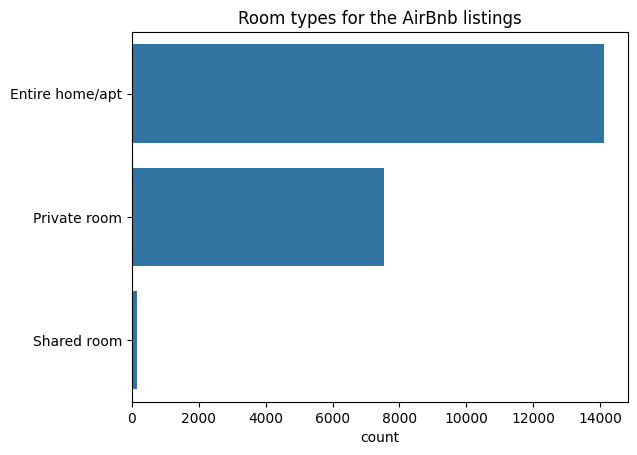

In [29]:
sb.countplot(listings_df_clean['room_type'])
plt.title('Room types for the AirBnb listings')
plt.ylabel(None);

##### Explanation
Based on the graph we can see that most Airbnb listings in Toronto are for whole houses or flats, suggesting that hosts would rather provide guests with more private, independent places. The need for tourists who value privacy and convenience—especially those who are traveling with family or in groups or staying longer—is probably what's driving this trend.
On the other hand, there are a lot less shared rooms available on the platform. Shared rooms, in which visitors share living quarters with the host or other visitors, appear to target a more specialized clientele, perhaps consisting of those on a tight budget or seeking a more social or local experience. Nonetheless, the general inclination towards full houses or apartments implies that Toronto's Airbnb industry mostly concentrates on offering visitors increased independence and comfort throughout their visit.


#### Neighbourhoods with the most and least number of Airbnb Listings

In [30]:
# count neighbourhoods
neighborhood_count = listings_df_clean['neighbourhood_cleansed'].value_counts()

# create top ten
top10_neighbourhoods = neighborhood_count.head(10).sort_values(ascending=True)

# create bottom ten
bottom10_neighbourhoods = neighborhood_count.tail(10).sort_values(ascending=True)

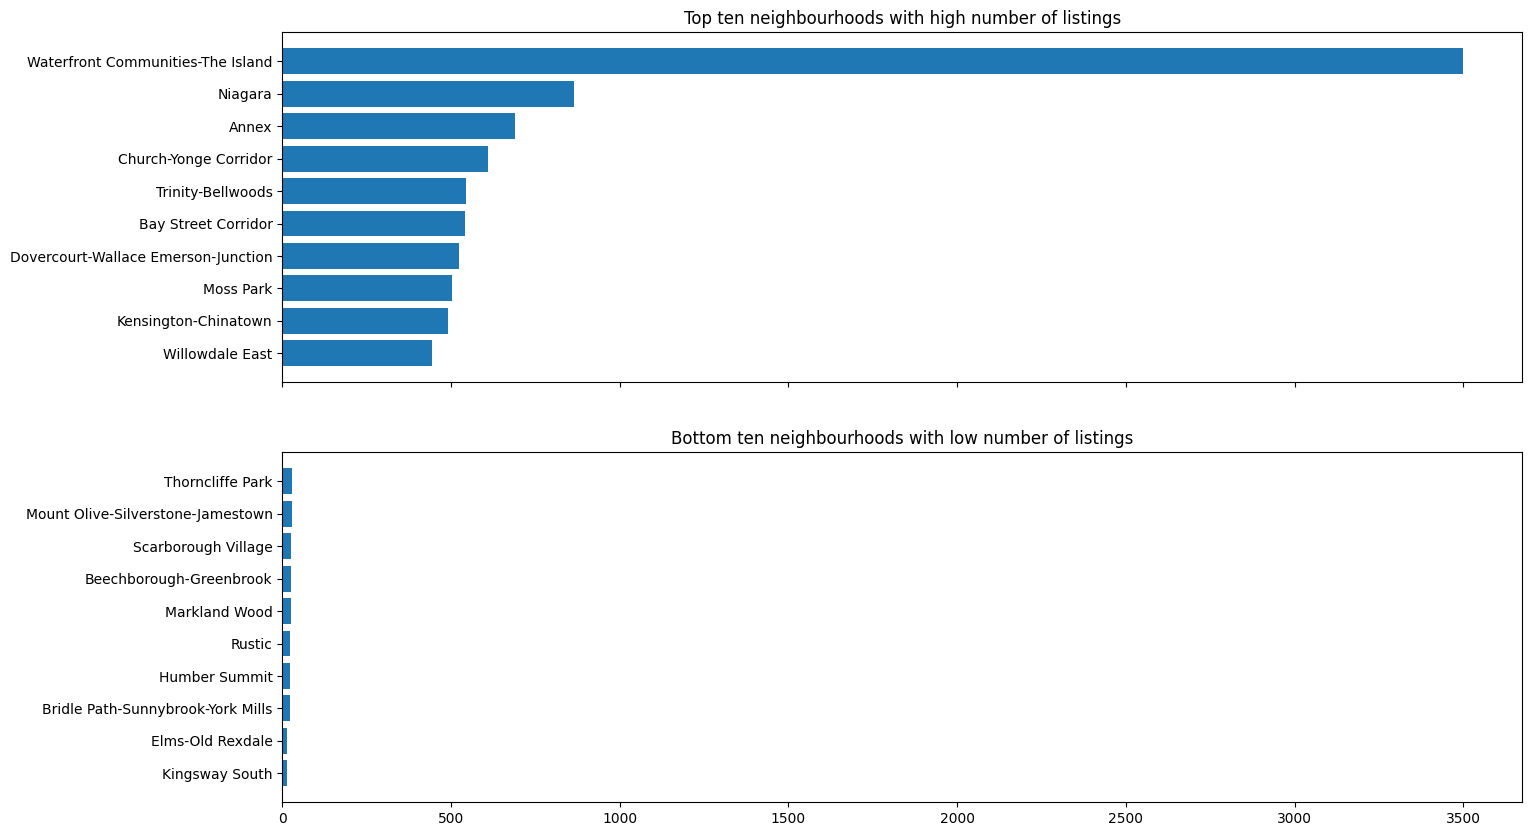

In [31]:
# plot bar charts
fig, ax = plt.subplots(2, 1, figsize=[16, 10], sharex=True)

ax[0].barh(top10_neighbourhoods.index, top10_neighbourhoods)
ax[0].set_title('Top ten neighbourhoods with high number of listings')

ax[1].barh(bottom10_neighbourhoods.index, bottom10_neighbourhoods)
ax[1].set_title('Bottom ten neighbourhoods with low number of listings');

##### Explanation
Waterfront Communities - the Island is oversaturated with AirBnB listing. There are other neighborhoods like Niagra, Annex, Moss Park, Willowdale East, etc that also have many AirBnb listings. On the flip side, neighborhoods like Thorncliffe Park, Rustic, and Kingsway South have few AirBnb listings.

From the customers' perspective, if you're looking to stay in an AirBnb in Toronto and you are not restricted to a certain location by other external/personal factors, you might want to consider neighborhoods like the Waterfront communities, Niagra, Annex, Moss Park, Willowdale East, etc, as supply is high. In other neighborhoods like Thorncliffe Park, Rustic, and co., it maybe harder to find an available Airbnb.

From the hosts' perspective, Waterfront Communities will come with a lot of competition. It might be safer to consider other options. Perhaps you may want to set up a listing where supply is low? Before doing that, however, you may want to do some market research to understand why there are fewer listings in those areas. Could it be that the demand is lower? Or the cost of living is low and therefore the potential income is lower? Next, we will consider prices.


#### Price Distribution

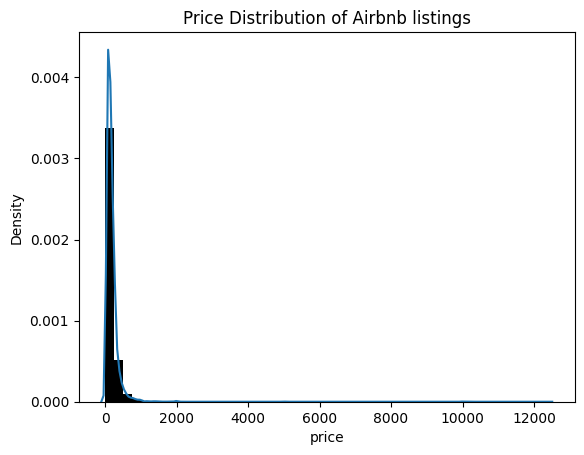

In [32]:
# plot price distribution
plt.hist(listings_df_clean['price'], bins=50, density=True, color='black')
sb.kdeplot(listings_df_clean['price'])
plt.title('Price Distribution of Airbnb listings');

##### Explanation
According to the graph of Airbnb price distribution against density, the prices are strongly skewed to the right, showing a high number of listings that are reasonably low to mid-priced while fewer homes are priced at the higher end of the spectrum. While reasonably priced alternatives are prevalent, this right-skewed distribution indicates that certain listings have much higher costs; these could be luxury or premium residences situated in Toronto's most desirable neighborhoods.

We may identify communities with reasonably priced listings and those where premium pricing is appropriate due to factors like location, amenities, or visitor demand with the use of this analysis.



In [33]:
# calculate neighbourhood median price
median_price_per_neighborhood = listings_df_clean.groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=False)

# neighborhood with highest median
top10_median_price_neighborhoods = median_price_per_neighborhood.head(10).sort_values(ascending=True)

# neighborhood with lowest median
bottom10_median_price_neighborhoods = median_price_per_neighborhood.tail(10).sort_values(ascending=True)

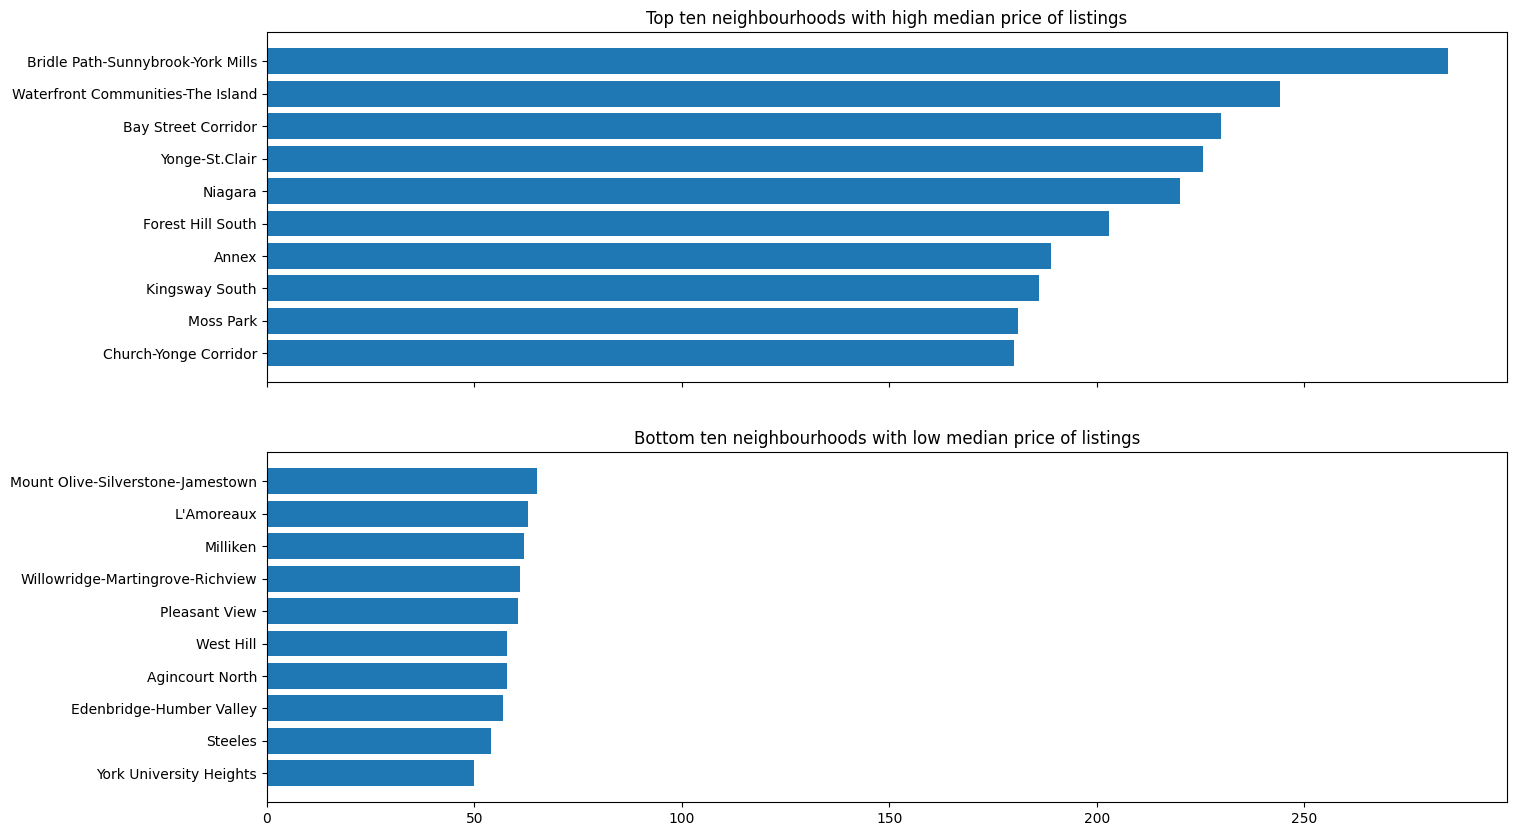

In [34]:
# plot bar charts
fig, ax = plt.subplots(2, 1, figsize=[16, 10], sharex=True)

ax[0].barh(top10_median_price_neighborhoods.index, top10_median_price_neighborhoods)
ax[0].set_title('Top ten neighbourhoods with high median price of listings')

ax[1].barh(bottom10_median_price_neighborhoods.index, bottom10_median_price_neighborhoods)
ax[1].set_title('Bottom ten neighbourhoods with low median price of listings');

##### Explanation
While the order is not the same as the previous charts of top ten and botton ten neighborhoods, we can see that generally, the neighborhoods with more AirBnB listings have higher median prices than neighborhoods with fewer listings. Would we not assume that places with lesser supply should have higher prices? Since this is not the case, we can infer that there are other factors at play here; perhaps the standard of living in the neighborhoods for instance. To further explore neighborhood prices, we can segment the listing prices into cheap, average, and expensive, and see the proportion of these in the neighborhoods.


In [35]:
# Assign labels to three equal percentile groups for price
price_labels = ['Cheap', 'Average', 'Expensive']

# since price is heavily skewed, perform a transformation, e.g. log transformation to normalize the distribution
log_price = np.log(listings_df_clean['price'])

# create the price categories
listings_df_clean['price_label'] = pd.qcut(log_price, q=3, labels=price_labels)

In [36]:
# show the minimum and maximum values of each price category
listings_df_clean.groupby('price_label', observed=False)['price'].agg(['min', 'max'])

,min,max
price_label,,
Cheap,3.0,101.0
Average,102.0,187.0
Expensive,188.0,12400.0


In [37]:
# save the listings file at this point
listings_df_clean.to_csv('cleaned_listings.csv', index=False)

In [38]:
# count the price labels per neighbourhood
price_count_per_neighborhood = listings_df_clean.groupby(['neighbourhood_cleansed', 'price_label'], observed=False).size()\
    .reset_index(name='count')

# calculate the total count per neighborhood
total_per_neighbourhood = price_count_per_neighborhood.groupby('neighbourhood_cleansed')['count'].transform('sum')

# calculate the proportion of each price label in each neighborhoood
price_count_per_neighborhood['proportion'] = price_count_per_neighborhood['count'] / total_per_neighbourhood

# check the price labels in neighbourhoods with the highest and lowest number of listings
price_cat_most_listing_neighborhooods = price_count_per_neighborhood[price_count_per_neighborhood['neighbourhood_cleansed'].isin(top10_neighbourhoods.index)]
price_cat_least_listing_neighborhooods = price_count_per_neighborhood[price_count_per_neighborhood['neighbourhood_cleansed'].isin(bottom10_neighbourhoods.index)]

In [39]:
# Define a dictionary that maps specific labels to colors
price_palette = {'Cheap': '#1f77b4', 'Average': '#A9A9A9', 'Expensive': '#D3D3D3'}

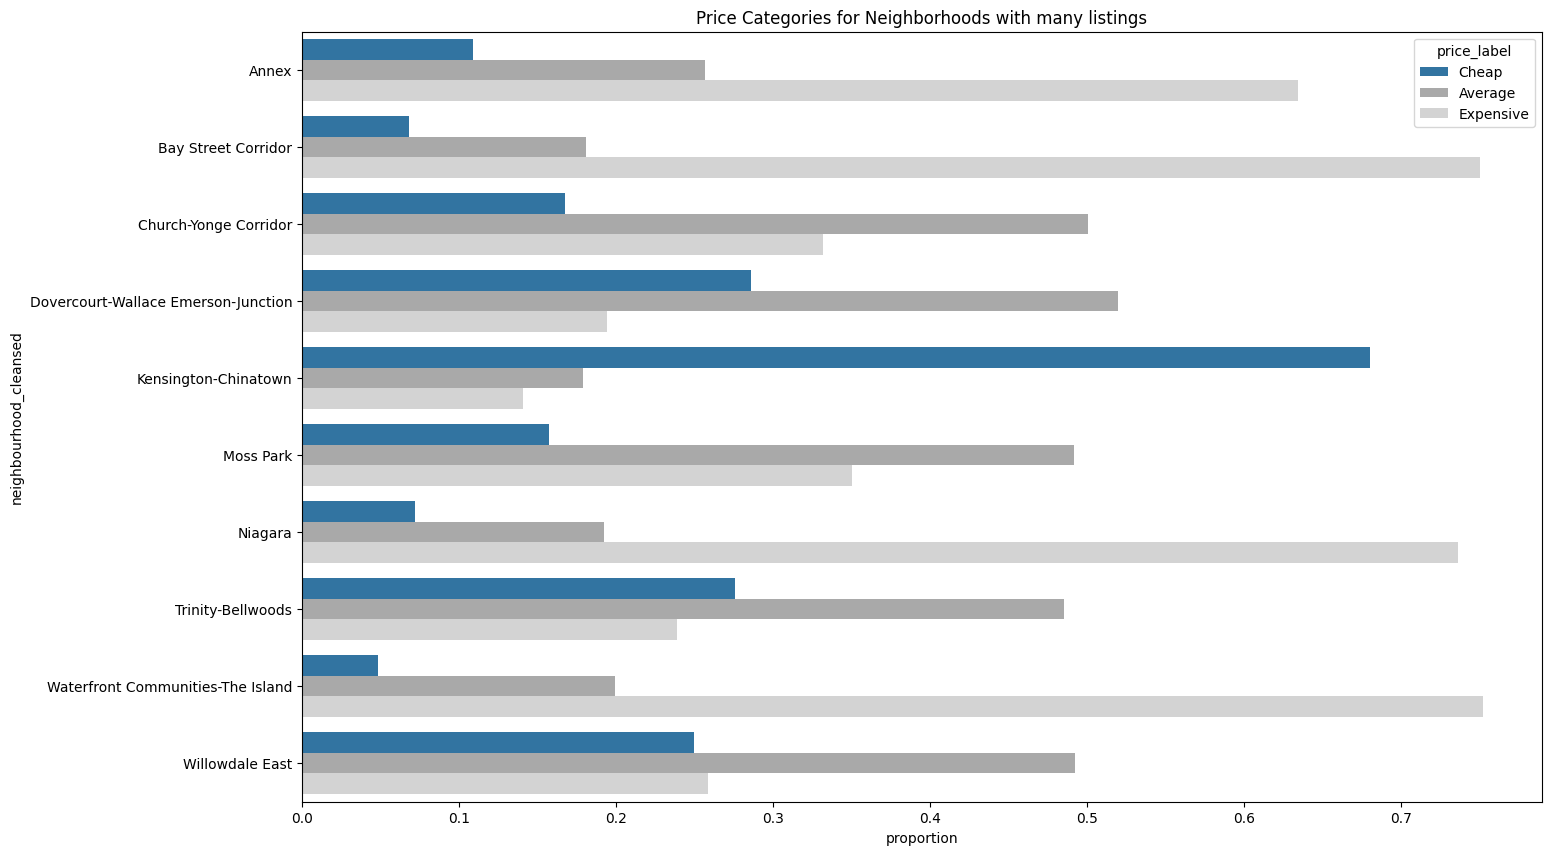

In [40]:
# plot the price labels of the neighborhoods with high number of listings
plt.figure(figsize=[16,10])
sb.barplot(data = price_cat_most_listing_neighborhooods, y='neighbourhood_cleansed', x='proportion', hue='price_label',
           hue_order=['Cheap', 'Average', 'Expensive'],
           palette=price_palette)
plt.title('Price Categories for Neighborhoods with many listings');

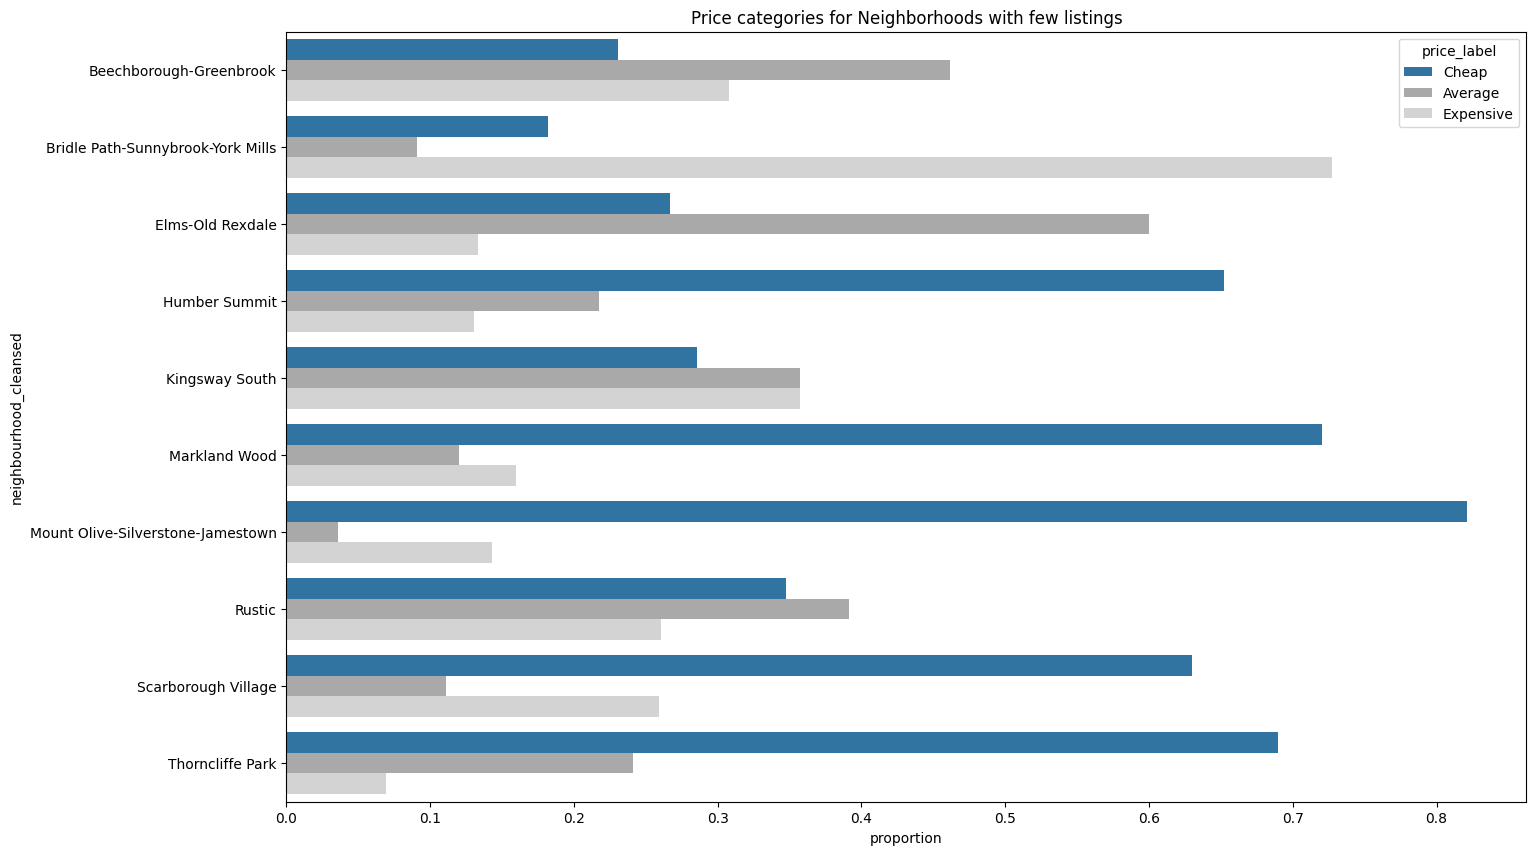

In [41]:
# plot the price labels of the neighborhoods with few number of listings
plt.figure(figsize=[16,10])
sb.barplot(data = price_cat_least_listing_neighborhooods, y='neighbourhood_cleansed', x='proportion', hue='price_label',
           palette=price_palette)
plt.title('Price categories for Neighborhoods with few listings');

##### Explanation
Again, we see that, neighborhoods with many listings have more expensive listings, although Kesington-Chinatown is an exception. IT has many listings and most of them are cheap!

For the neighborhoods with few listings, most of them are cheap, with only Bridle Path-Sunnybrook-York Mills being notably expensive.

To revisit the previous analysis, as a customer, if you're looking to stay in an AirBnb in Toronto, you are not restricted to a certain location and **you are on a budget**, Kesington-Chinatown might be the place for you.

As a host, if you don't want to deal with too much competition, you can consider listing a property in Bridle Path-Sunnybrook-York Mills as there will be less competition and you can still list it for a high-end price. It is still important to back up this analysis with market research on the neighborhood.

#### Review Scores Distribution

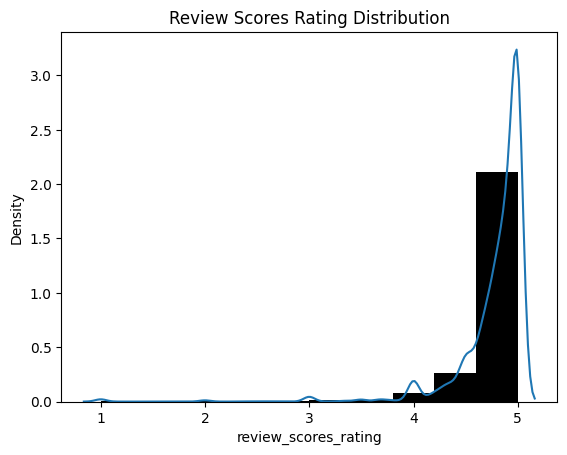

In [42]:
plt.hist(listings_df_clean['review_scores_rating'], density=True, color='black')
sb.kdeplot(listings_df_clean['review_scores_rating'])
plt.title('Review Scores Rating Distribution');

##### Explanation
We can see that Airbnb prices are heavily skewed to the right. 
This analysis enables us to pinpoint Toronto neighborhoods that have affordable Airbnb listings—perfect for travelers on a tight budget looking for a good deal—as well as those where premium pricing is warranted because of things like opulent amenities, desirable locations, or high demand from tourists. We can gain a better understanding of how different communities combine affordability and luxury by concentrating on median prices. With the use of these insights, Airbnb hosts will be able to better tailor their pricing policies and assist visitors in selecting neighborhoods that suit their tastes and financial constraints. Next, we will examine the central tendency, in this case, the median, of the prices per neighborhood.


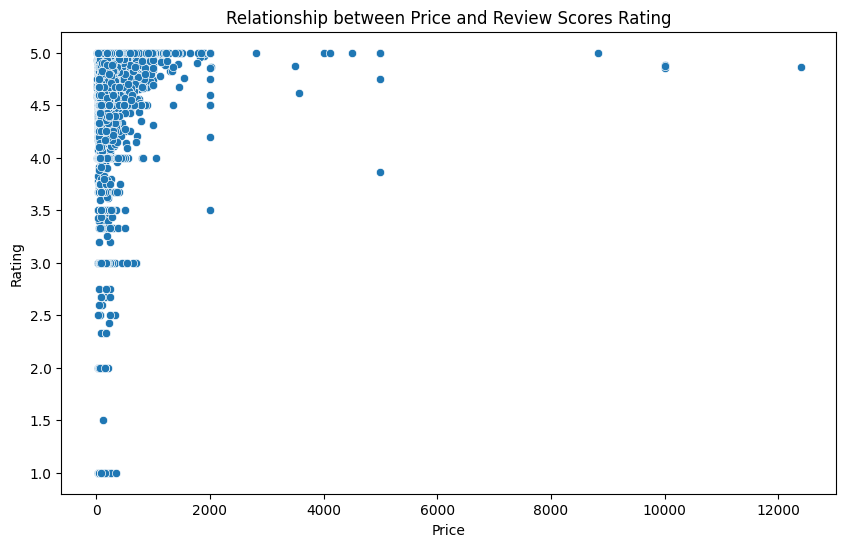

In [43]:
# scatter plot
plt.figure(figsize=(10, 6))
sb.scatterplot(x='price', y='review_scores_rating', data=listings_df_clean)
plt.title('Relationship between Price and Review Scores Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

##### Explanation
This graph implies  that there is no clear relationship between review scores and prices for Airbnb listings. While some listings do receive higher scores for higher-priced listings this lack a linear trend indicating that the price alone does not appear to significantly influence customer ratings. This finding makes us  wonder what factors truly matter to guests. If price isn’t a key determinant of customer satisfaction, it may be worth investigating other aspects such as the quality and variety of amenities offered. 

#### Amenities

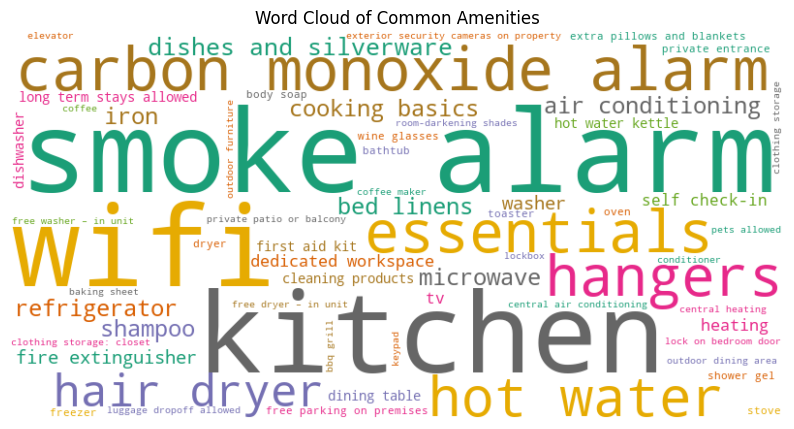

In [44]:
# plot a word cloud of amenities
amenities_wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      min_font_size=10,
                      colormap='Dark2').generate_from_frequencies(amenities_frequencies)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(amenities_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Common Amenities")
plt.show()

##### Explanation

The word cloud above helped us call attention to the most common amenities offered in Toronto Airbnb listings, with features such as Wifi, Smoke alarms, kitchens, carbon monoxide alarms, essentials, hangers, and hot water repeatedly occurring among others. These facilities are seen to be customary and necessary to guarantee visitors' comfort and security while visiting.

We tallied the common amenities offered in each listing to further examine the significance of these elements. By doing this, we hope to investigate any potential correlations between a property's review rankings and the amount of amenities it provides. This will enable us to ascertain whether listings with a greater number of amenities typically have happier guests, suggesting that the diversity of amenities may have a big impact on reviews.

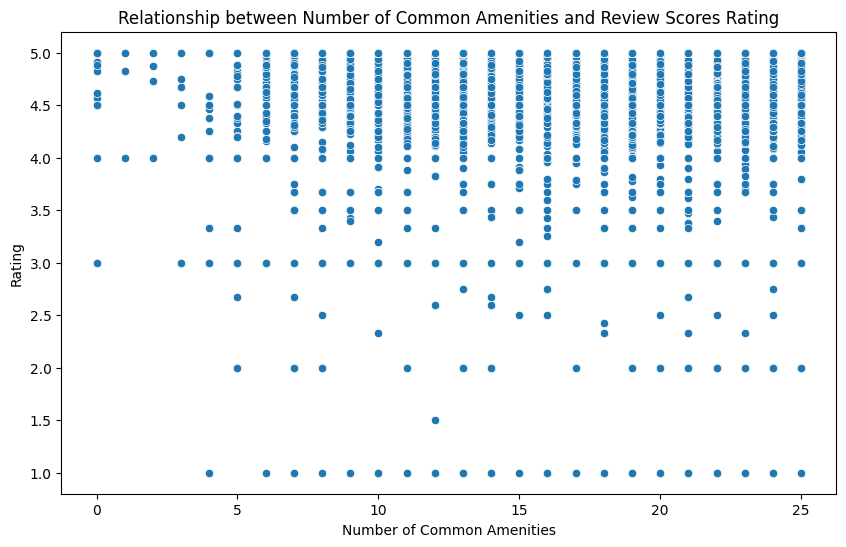

In [45]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x='number_of_common_amenities', y='review_scores_rating', data=listings_df_clean)
plt.title('Relationship between Number of Common Amenities and Review Scores Rating')
plt.xlabel('Number of Common Amenities')
plt.ylabel('Rating')
plt.show()

##### Explanation
Again there is no clear relationship between the number of common amenities and the review score ratings. The research contradicts expectations that a higher quantity of facilities (such as kitchens, hot water, smoke detectors, and Wi-Fi) would result in higher review rankings.

This lack of a clear correlation makes us wonder what variables actually affect how satisfied guests are. Positive ratings may not always be directly correlated with the number of amenities offered; this suggests that customers may place a higher value on other aspects of their experience.

In order to investigate this further, we will examine the reviews dataset and examine visitor comments and feedback to determine which particular features of their visits most resonate.

## Reviews

Contents covered:

    - Data Inspection
    - Data Cleaning 
    - EDA and Answering Relevant Guiding Questions
    

### Data Inspection

To get a clearer idea of our Reviews dataset, we took a random sample of 5 rows. This gave us a clearer picture of how the Reviews dataset looks.

In [46]:
# randomly sample 5 rows
reviews_df.sample(5, random_state=seed)

,listing_id,id,date,reviewer_id,reviewer_name,comments
240497,26230502,530113744,2019-09-15,59592384,Lucas,All was perfect!
108132,14227945,283822778,2018-06-30,95947849,Laura,Our group had a great week in Toronto! The lo...
55073,6732046,207979804,2017-10-30,87322955,Meaghan,Fully loaded basement suite with everything on...
338939,42671571,645232341,2020-08-01,171469608,Michael,"A very comfortable living space, and centrally..."
91867,12943889,260073796,2018-05-03,171641197,Trent,"First off, great host, replied almost instantl..."


In [47]:
# dataframe summary
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573077 entries, 0 to 573076
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     573077 non-null  int64 
 1   id             573077 non-null  int64 
 2   date           573077 non-null  object
 3   reviewer_id    573077 non-null  int64 
 4   reviewer_name  573077 non-null  object
 5   comments       572996 non-null  object
dtypes: int64(3), object(3)
memory usage: 26.2+ MB


**From the Dataframe Summary:** We used the info() function to get the summary of our dataset. This helped us understand the data types, the presence of null values, and the information of columns and rows in the dataset.

We can now see the number of rows and columns we have: 573077 rows and 6 columns. 

Moreover, we can see that our dataset comprises a combination of integers and objects.




In [48]:
# duplicate rows
reviews_df.duplicated().sum()

np.int64(0)

In [49]:
# duplicate ids
reviews_df.duplicated('id').sum()

np.int64(0)

In [50]:
# duplicate reviewer ids
reviews_df.duplicated('reviewer_id').sum()

np.int64(83504)

In [51]:
# duplicate listing ids
reviews_df.duplicated('listing_id').sum()

np.int64(556467)

In [52]:
# summary statistics
reviews_df.describe()

,listing_id,id,reviewer_id
count,5.730770e+05,5.730770e+05,5.730770e+05
mean,2.522076e+17,5.461056e+17,1.876395e+08
std,3.990729e+17,4.850185e+17,1.653977e+08
min,1.419000e+03,7.830000e+03,1.396000e+03
25%,1.738663e+07,4.614535e+08,4.832282e+07
50%,3.342620e+07,6.557165e+17,1.374076e+08
75%,6.585939e+17,9.913716e+17,2.877001e+08
max,1.234043e+18,1.239275e+18,6.500730e+08


In [53]:
# summary statistics 2
reviews_df.describe(include='O')

,date,reviewer_name,comments
count,573077,573077,572996
unique,4659,83243,549118
top,2024-08-05,David,.
freq,1459,4064,738


In [54]:
# identify special characters
reviews_df[~(reviews_df['comments'].str.contains(r'[a-zA-Z0-9]', na=False))].sample(10, random_state=10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
140142,17137395,365675487,2019-01-01,106097391,Changmin,바로 앞에 스트릿카 정류장이 있어 이동이 매우 편리하며 혼자 사용하기에 비교적 넓은...
561365,1136226615654135999,1142050256011193967,2024-04-24,284196432,Yifei,非常好的入住体验
9584,1066718,102905019,2016-09-19,27840959,Taro,飛行機の到着から空港での手続きが遅れても家の前で待ってくれていた。
463059,757862052071287629,1137749164346991495,2024-04-18,322103786,영주,좋아요
426606,650159692635743613,707201306400596165,2022-09-02,206730993,Yolanda,房东阿姨叔叔都非常热情，房间很大很干净，下次来还会入住的
190584,21160812,763025067410121689,2022-11-18,178148433,Phil,NaN
142681,17186961,194005048,2017-09-15,71196232,James,.
378551,50732001,1022594073372926489,2023-11-11,484195431,복순,깨끗하고 편안한 숙소. 위치도 너믄 좋음.
343462,42975337,1189166455162665273,2024-06-28,114770912,丹,位置优越，提供的设施稍显简陋，其他尚可
198525,21838013,572656937,2019-12-03,295014098,Nhã,🌟🌟🌟🌟🌟


In [55]:
# identify spelling errors in comments
reviews_df[reviews_df['reviewer_name'].str.contains('Liang Kai')]

,listing_id,id,date,reviewer_id,reviewer_name,comments
567818,1169504956483321840,1174769284454819723,2024-06-08,578656973,Liang Kai,awsome


In [56]:
# identify excess whitespaces
reviews_df[(reviews_df['comments'].str.contains(r'\s{2,}', na=False))]

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1419,38924112,2015-07-19,11308465,Marcela,Having the opportunity of arriving to Alexandr...
1,1419,44791978,2015-08-29,9580285,Marco,We have no enough words to describe how beauty...
4,1419,177702208,2017-08-03,13987100,Kate,Beautiful home. Very comfortable and clean. Pe...
6,8077,7830,2009-08-20,12750,Margarita,We had a lovely time in Toronto! Kathie and La...
9,8077,12177,2009-10-02,36703,Wendy,\r<br/>The view of the CN tower is just as the...
...,...,...,...,...,...,...
573041,1230093089989030817,1235566446376735484,2024-08-31,233595230,Charitha,The place is very nice and clean. The place is...
573051,1225419945654004521,1236991415291319020,2024-09-02,466054833,Khoa,The place is located in a quiet neighbor but n...
573052,1225436130755129358,1235649265950053181,2024-08-31,22859671,James,Anthony was an attentive host. If I ever reach...
573068,1232221953395352653,1237040219098312855,2024-09-02,75903905,New,Great place to book in Toronto. Spacious for ...


### Data Cleaning

In [57]:
# first create a copy of the dataframe
reviews_df_clean = reviews_df.copy()

#### 1. Converting id columns to strings and date columns to DateTime format
We converted the id columns datatype to string as mentioned above to utilize it as a unique identifier not as a numerical column as we don't have to do any computation. After this, we convert the date column to the datetime format in year-month-date format to ensure consistency in the data and effective manipulation for analysing trends and help in managing timezone

In [58]:
# convert id columns to string datatypes
reviews_df_clean[['listing_id', 'id', 'reviewer_id']] = reviews_df_clean.loc[:, ['listing_id', 'id', 'reviewer_id']].astype(str)
reviews_df_clean['date'] = pd.to_datetime(reviews_df_clean['date'], format='%Y-%m-%d')

In [59]:
# test
reviews_df_clean.dtypes

listing_id               object
id                       object
date             datetime64[ns]
reviewer_id              object
reviewer_name            object
comments                 object
dtype: object

#### 2. ID Indexing
We set the id to the index of the data frame for enhancing our data retrieval and help us in faster operations like filtering, sorting, or grouping of the data.

In [60]:
# set index
reviews_df_clean.set_index('id', inplace=True)

In [61]:
# test
reviews_df_clean.index

Index(['38924112', '44791978', '45957133', '67295154', '177702208',
       '179394665', '7830', '9941', '11995', '12177',
       ...
       '1237096891626287225', '1237040219098312855', '1237072443558320583',
       '1236346707288363048', '1239240330178050543', '1237006458719581379',
       '1235643868703935001', '1237039990266700869', '1239177218317027784',
       '1238562455560871223'],
      dtype='object', name='id', length=573077)

#### 3. Data Quality

The 'comments' column contains excess whitespaces, some null values and some weird values (full stops, hyphens, emojis etc). The reviews table contains information about the review a customer leaves regarding a listing. If we remove the rows with these null and weird comments, we will lose accuracy in terms of how many reviews were given for a listing.

Steps taken to resolve this:

    1- Identify non-alphanumeric characters (punctuation marks such as full stops (.), hyphens (-), and other special characters)
    
    2- Decide on replacement strategy: We established that instead of simply removing these characters, we would replace them with ‘NA’ to indicate that the original information was either incomplete or not applicable. This decision was made to retain the structural integrity of the data while clearly indicating where information is lacking.
   

### Roadblock

**A roadblock we are facing here is that some of the comments are written in foreign languages like Spanish or Chinese. Do we translate them? How do we identify the ones to be translated and separate them from the English ones? Also, the translator module calls APIs to perform the translation and with a large data frame, it can become slow. Another roadblock is that many words in the comments column (reviews) do not add value to our analysis. We would need to omit these words to obtain a more accurate analysis. However, this process would be time-consuming and may not be feasible within the timeframe of this course.**


In [62]:
# before
reviews_df_clean[(reviews_df_clean['comments'] == '-') | (reviews_df_clean['comments'] == '.')].sample(5, random_state=seed)

,listing_id,date,reviewer_id,reviewer_name,comments
id,,,,,
1121117583931349220,1074270340785807975,2024-03-26,489917970,Terkuma,.
423859343713188833,7390728,2021-08-07,107921911,Daanish,.
218739242,21977950,2017-12-14,152260984,H,.
316155837,21440143,2018-08-30,177614928,Eva,.
883330388019053611,23911772,2023-05-03,78935130,Rick,-


In [63]:
# remove excess whitespace
reviews_df_clean['comments'] = reviews_df_clean['comments'].str.strip().str.replace(r'\s{2,}', ' ', regex=True)

# replace nulls, fullstops, and hyphens
reviews_df_clean['comments'] = reviews_df_clean['comments'].fillna('NA').replace('.', 'NA').replace('-', 'NA')

In [64]:
# test
reviews_df_clean.loc[['1121117583931349220', '423859343713188833', '218739242', '316155837', '883330388019053611']]

,listing_id,date,reviewer_id,reviewer_name,comments
id,,,,,
1121117583931349220,1074270340785807975,2024-03-26,489917970,Terkuma,NA
423859343713188833,7390728,2021-08-07,107921911,Daanish,NA
218739242,21977950,2017-12-14,152260984,H,NA
316155837,21440143,2018-08-30,177614928,Eva,NA
883330388019053611,23911772,2023-05-03,78935130,Rick,NA


### EDA

In [65]:
# turn strings to a list of their elements
def tokenize_text(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return words

#### What are customers saying?

In [66]:
# create column for wordcloud

words_to_remove = []
reviews_df_clean['commentsWC'] = reviews_df_clean['comments'].apply(tokenize_text)\
    .apply(lambda x: [word for word in x if word not in stop_words and word not in words_to_remove])

# create frequencies
comment_frequencies = Counter()
for comments in reviews_df_clean['commentsWC']:
    comment_frequencies.update([comment for comment in comments])

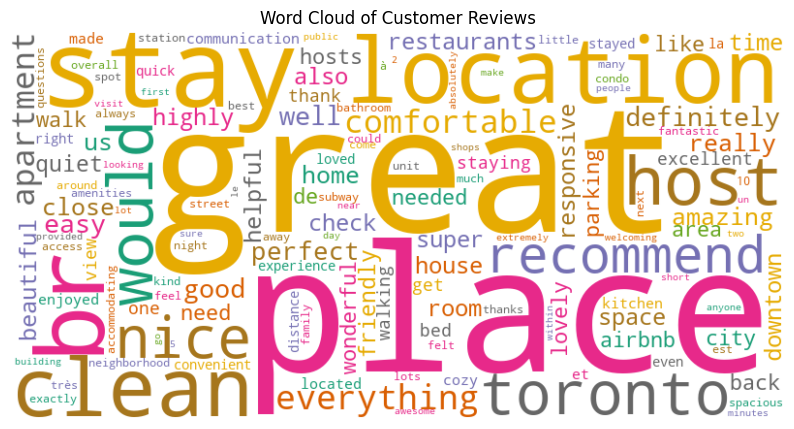

In [67]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      min_font_size=10,
                      colormap='Dark2').generate_from_frequencies(comment_frequencies)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Customer Reviews")
plt.show()

##### Explanation
There seems to be a lot of nice words: great, nice, clean, location, comfortable, recommend, perfect, friendly etc. **From the word cloud, it's less about the price or even about the amenities and more about the general experience in the place and with the host.** Recall that in the review score ratings distribution, most of the reviews were above 4 out of 5 so it makes sense that the customer reviews are good. Let's dig deeper into some sentiment analysis and also find out what the bad reviews are saying (GeeksforGeeks, n.d.).


In [68]:
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(comment):
    return sia.polarity_scores(comment)

In [69]:
# create sentiment scores for comments
reviews_df_clean[['neg', 'neu', 'pos', 'compound']] = reviews_df_clean['comments'].apply(get_sentiment).apply(pd.Series)

In [70]:
# save the data at this checkpoint
reviews_df_clean.to_csv('cleaned_reviews.csv', index=False)

In [71]:
# select listing ids with bad ratings
listings_with_bad_ratings = listings_df_clean.loc[listings_df_clean['review_scores_rating'] < 3, 'id']

In [72]:
# select the reviews for listings with bad ratings
reviews_listings_with_bad_ratings = reviews_df_clean[reviews_df_clean['listing_id'].isin(listings_with_bad_ratings)]

In [73]:
# create word frequencies
reviews_frequencies = Counter()
words_to_remove = ['br']
for reviews in reviews_listings_with_bad_ratings['commentsWC']:
    reviews_frequencies.update([review for review in reviews if review not in words_to_remove])

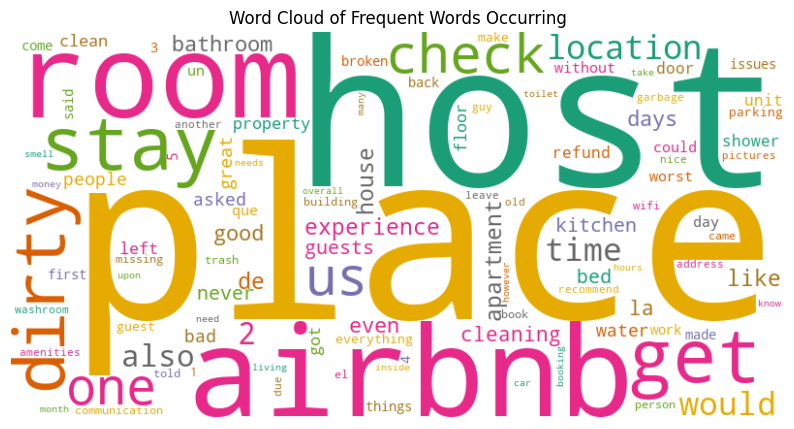

In [74]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      min_font_size=10,
                      colormap='Dark2').generate_from_frequencies(reviews_frequencies)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Frequent Words Occurring")
plt.show()

##### Explanation
While the word cloud will still benefit from more iterative cleaning, it looks like most of the bad reviews are either about the host or the general cleanliness of the place. It will seem as though what customers care about is not really how many amenities you provide or the price of the listing, what they care about instead is the general experience in the place and good customer experience with the host. As a host, making a good connection with your customers and welcoming them into somewhere pristine is key.

Now back to customers, for the next one year, what is availability looking like in Toronto?


## Calendar

Contents covered:

    - Data Inspection
    - Data Cleaning 
    - EDA and Answering Relevant Guiding Questions

### Data Inspection

To get a clearer idea of our Calendar dataset, we took a random sample of 5 rows. This gave us a clearer picture of how the Calendar dataset looks.

In [75]:
# randomly sample 5 rows
calendar_df.sample(5, random_state=42)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
189621,4461364,2025-05-06,f,$139.00,NaN,28.0,56.0
3682374,645509681038849744,2025-05-09,t,$165.00,NaN,28.0,365.0
6637438,1116731987509563818,2025-05-03,t,$350.00,NaN,1.0,365.0
3480652,581698767278976054,2025-03-10,t,$70.00,NaN,28.0,365.0
7358284,1187695568803953838,2025-03-26,t,$499.00,NaN,1.0,365.0


In [76]:
# dataframe summary
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7966127 entries, 0 to 7966126
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 425.4+ MB


In [77]:
# summary statistics
calendar_df.describe()

,listing_id,minimum_nights,maximum_nights
count,7.966127e+06,7.966125e+06,7.966125e+06
mean,5.509917e+17,2.482665e+01,5.949119e+02
std,5.002133e+17,3.952979e+01,4.509680e+02
min,1.419000e+03,1.000000e+00,1.000000e+00
25%,3.213635e+07,3.000000e+00,1.850000e+02
50%,7.103590e+17,2.800000e+01,3.650000e+02
75%,1.031831e+18,2.800000e+01,1.125000e+03
max,1.238623e+18,1.125000e+03,1.000100e+04


In [78]:
calendar_df['listing_id'].nunique()

21825

In [79]:
calendar_df.groupby('listing_id').size()

listing_id
1419                   365
8077                   365
26654                  365
27423                  365
30931                  365
                      ... 
1238375993354181658    365
1238381731476165839    365
1238429354932685108    365
1238458106144360234    365
1238622881503213641    365
Length: 21825, dtype: int64

### Data Cleaning

In [80]:
calendar_df_clean = calendar_df.copy()

##### 1. Type Conversion
Convert columns to correct datatypes: ids as strings (although they are numbers because numeric datatypes connot some sort of relationship between values meanwhile these are just identifiers), date as datetime, available as boolean, and price as float.

In [81]:
# before
calendar_df_clean.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [82]:
# code
calendar_df_clean['listing_id'] = calendar_df_clean['listing_id'].astype(str)
calendar_df_clean['date'] = pd.to_datetime(calendar_df_clean['date'], format='%Y-%m-%d')
calendar_df_clean['available'] = calendar_df_clean['available'].replace('f', False).replace('t', True)
calendar_df_clean['available_numeric'] = calendar_df_clean['available'].astype(int)
calendar_df_clean['price'] = calendar_df_clean['price'].str.replace('$', '').str.replace(',','').astype(float)

C:\Users\user\AppData\Local\Temp\ipykernel_5056\3056811743.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calendar_df_clean['available'] = calendar_df_clean['available'].replace('f', False).replace('t', True)


In [83]:
# test
calendar_df_clean.dtypes

listing_id                   object
date                 datetime64[ns]
available                      bool
price                       float64
adjusted_price               object
minimum_nights              float64
maximum_nights              float64
available_numeric             int64
dtype: object

#### 2: Dropping Irrelevant Columns
Drop the adjusted price column which has completely null values

In [84]:
# code
calendar_df_clean.drop('adjusted_price', axis=1, inplace=True)

In [85]:
# test
calendar_df_clean.columns

Index(['listing_id', 'date', 'available', 'price', 'minimum_nights',
       'maximum_nights', 'available_numeric'],
      dtype='object')

#### 3: Logical Cleaning
The price column contains a value that is unrealistic ($0) for a particular listing. We clean this column by converting it to null as $0 will imply that the listing is free which may not be the case. If we had prices for some days, we could have extrapolated those prices for days that are $0 but since it is all $0, we will just convert it to null. This is interesting because usually the case is to handle nulls but now we are intentionally introducing nulls.


In [86]:
# code
display(calendar_df_clean.describe())
print(calendar_df_clean.loc[calendar_df_clean['price'] == 0, 'listing_id'].unique())
print(calendar_df_clean.loc[calendar_df_clean['listing_id'] == '20235002', 'price'].unique())
calendar_df_clean['price'] = calendar_df_clean['price'].replace(0, np.nan)

,date,price,minimum_nights,maximum_nights,available_numeric
count,7966127,7.966127e+06,7.966125e+06,7.966125e+06,7.966127e+06
mean,2025-03-06 19:25:07.787110144,2.344833e+02,2.482665e+01,5.949119e+02,4.220441e-01
min,2024-09-05 00:00:00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2024-12-06 00:00:00,7.900000e+01,3.000000e+00,1.850000e+02,0.000000e+00
50%,2025-03-07 00:00:00,1.290000e+02,2.800000e+01,3.650000e+02,0.000000e+00
75%,2025-06-06 00:00:00,2.200000e+02,2.800000e+01,1.125000e+03,1.000000e+00
max,2025-09-10 00:00:00,1.300000e+04,1.125000e+03,1.000100e+04,1.000000e+00
std,NaN,6.338439e+02,3.952979e+01,4.509680e+02,4.938855e-01


['20235002']
[0.]


In [87]:
# test
calendar_df_clean[calendar_df_clean['price'] == 0]

,listing_id,date,available,price,minimum_nights,maximum_nights,available_numeric


In [88]:
# save the data at this checkpoint
calendar_df_clean.to_csv('cleaned_calendar.csv', index=False)

### EDA

#### Price Trends

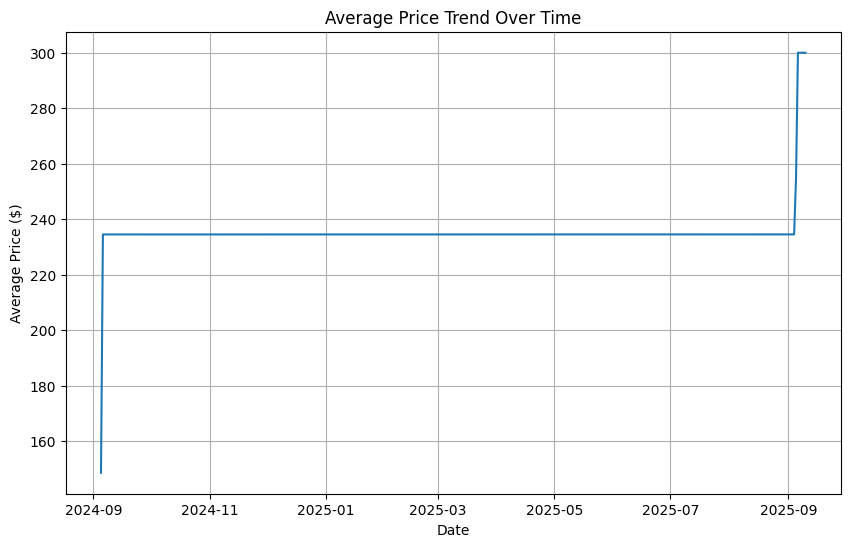

In [89]:
# Group by date and calculate the average price across all listings
average_price_per_day = calendar_df_clean.groupby('date')['price'].mean()

# Plot the average price trend
plt.figure(figsize=(10, 6))
plt.plot(average_price_per_day.index, average_price_per_day.values, label='Average Price')
plt.xlabel('Date')
plt.ylabel('Average Price ($)')
plt.title('Average Price Trend Over Time')
plt.grid(True)
plt.show()

##### Explanation
The prices for the next one year look to be stable on average, except for the increase in price in September 2024 and another anticipated increase in price in September 2025. Unfortunately, we only have one year worth of availablity data? Are there regulations that stipulate price increases to occur only one a year, and specifically in September? Whatever the case may be,  the average prices are expected to be stable for the most part which is good news for customers who will be able to plan one year ahead without worrying too muvh about inflation.

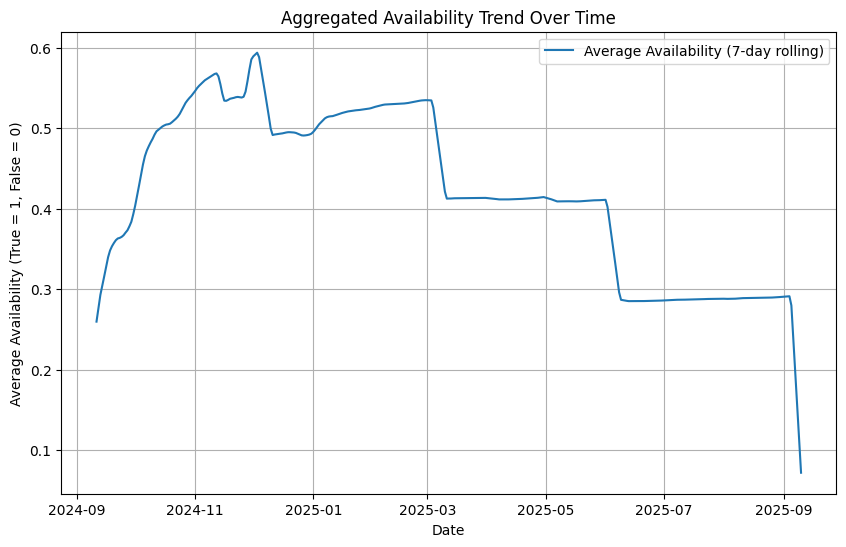

In [90]:
# Calculate the mean availability per day across all listings
availability_trend = calendar_df_clean.groupby('date')['available_numeric'].mean()

# Optionally apply a rolling window for smoothing (7-day rolling average)
availability_trend_rolling = availability_trend.rolling(window=7).mean()

# Plot the aggregated availability trend
plt.figure(figsize=(10,6))
plt.plot(availability_trend_rolling, label='Average Availability (7-day rolling)')
plt.xlabel('Date')
plt.ylabel('Average Availability (True = 1, False = 0)')
plt.title('Aggregated Availability Trend Over Time')
plt.grid(True)
plt.legend()
plt.show()

##### Explanation
From September to November 2024, the chances of finding available listings increase until a period in November when there's a slight drop and another around Christmas/New Year. As we enter the new year, availability increases slightly until March after which it plateaus till May, drops, plateaus again and finally drops in September 2025.
This trend seems interesting and begs a final question...are the availability trends related to annual and local festive events in Toronto?

## Neighbourhoods

We began by making sure our dataset was clean and useful for our project, which involved examining the neighborhoods of Toronto. To ensure that our changes would not impact the original data, we first created a duplicate of the neighborhoods dataset.

Upon closer inspection, we discovered that the neighbourhood_group column only contained null values. We chose to delete this column as it had no information that was helpful for our study.


In [91]:
neighborhoods_df_clean = neighborhoods_df.copy()

In [92]:
# drop completely null column
neighborhoods_df_clean.drop('neighbourhood_group', axis=1, inplace=True)

In [93]:
# save at this checkpoint
neighborhoods_df_clean.to_csv('cleaned_neighbourhoods.csv', index=False)

## Events
We scoured the internet for information about upcoming local events and festivals in Toronto for the next one year from September 2024. We integrated this data together into a structured events DataFrame, which has the event name, start and end dates, and other important information for each event. By keeping track of these aspects, we can examine the relationships between these occurrences and shifts in Airbnb booking trends and user feedback, ultimately offering a more comprehensive understanding of how neighborhood events impact the Airbnb business (City of Toronto. n.d.; Wikipedia. n.d.). To access the detailed list of events, you can refer to this link: [Here](https://drive.google.com/file/d/1YCgSoY9XBzkb6XW--baISYTvHyvqlxgL/view?usp=drive_link) 

### Data Inspection

To get a clearer idea of our Events dataset, we took a random sample of 5 rows. This gave us a clearer picture of how the Events dataset looks.

In [94]:
# first five rows
events_df.head()

,Event list from https://en.wikipedia.org/wiki/Annual_events_in_Toronto and https://www.toronto.ca/explore-enjoy/festivals-events/,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,event,date_started,date_ended,comments
1,Winterlicious,2025-02-01,2025-02-15,First two weeks of February according to Wikip...
2,Summerlicious,2025-07-04,2025-07-20,Starts in July according to Wikipedia; general...
3,DesignTO Festival,2025-01-24,2025-02-02,https://designto.org/how-to-participate-in-des...
4,Canadian International AutoShow,2025-02-14,2025-02-23,https://www.cantonfair.net/event/3525-canadian...


In [95]:
# summary
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                             --------------  ----- 
 0   Event list from https://en.wikipedia.org/wiki/Annual_events_in_Toronto and https://www.toronto.ca/explore-enjoy/festivals-events/  53 non-null     object
 1   Unnamed: 1                                                                                                                         53 non-null     object
 2   Unnamed: 2                                                                                                                         53 non-null     object
 3   Unnamed: 3                                                                                        

In [96]:
# summary stats
events_df.describe()

,Event list from https://en.wikipedia.org/wiki/Annual_events_in_Toronto and https://www.toronto.ca/explore-enjoy/festivals-events/,Unnamed: 1,Unnamed: 2,Unnamed: 3
count,53,53,53,49
unique,53,50,41,49
top,event,2025-02-01,2025-05-04,comments
freq,1,2,3,1


In [97]:
# check for duplicates
events_df.duplicated().sum()

np.int64(0)

In [98]:
# check for duplicates in first column
events_df.duplicated(events_df.columns[0]).sum()

np.int64(0)

### Data Cleaning

In [99]:
# create a copy
events_df_clean = events_df.copy()

#### 1. Promote first row to header

In [100]:
# code
events_df_clean.columns = events_df_clean.iloc[0]
events_df_clean = events_df_clean.drop(0).reset_index(drop=True)

In [101]:
# test
events_df_clean.columns

Index(['event', 'date_started', 'date_ended', 'comments'], dtype='object', name=0)

#### 2. Type Conversion

In [102]:
# code
events_df_clean['date_started'] = pd.to_datetime(events_df_clean['date_started'])
events_df_clean['date_ended'] = pd.to_datetime(events_df_clean['date_ended'])

In [103]:
# test
events_df_clean.dtypes

0
event                   object
date_started    datetime64[ns]
date_ended      datetime64[ns]
comments                object
dtype: object

#### 3. Drop Irrelevant Columns

In [104]:
# code
events_df_clean.drop('comments', axis=1, inplace=True)

In [105]:
# test
events_df_clean.dtypes

0
event                   object
date_started    datetime64[ns]
date_ended      datetime64[ns]
dtype: object

In [106]:
# save data at this checkpoint
events_df_clean.to_csv('cleaned_events.csv', index=False)

### EDA

#### How many events do we have per month?

In [107]:
# extract month name from start date
events_df_clean['month_name'] = events_df_clean['date_started'].dt.month_name()

# count month occurences
events_per_month = events_df_clean['month_name'].value_counts()

# create a list of months ordered from Dec to Jan
month_list = [i for i in calendar.month_name if i][::-1]

# reindex the month occurence
events_per_month = events_per_month.reindex(month_list)

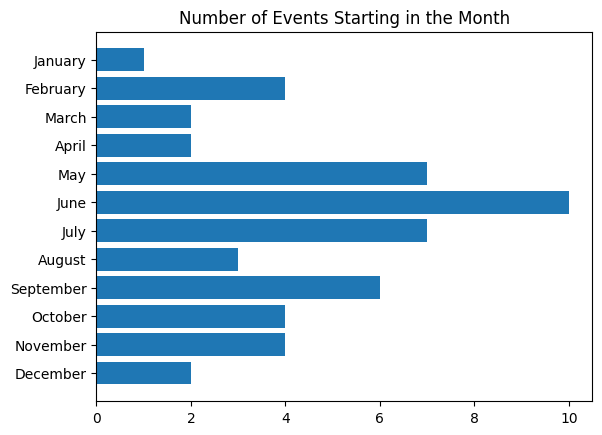

In [108]:
# plot bar chart
plt.barh(width = events_per_month, y = events_per_month.index)
plt.title('Number of Events Starting in the Month');


##### Explanation
We can see that most of the events start in summer, especially in June while very few events start in January. What happens when we check the number of listings available in January compared to the number of listings available in June?

#### Availablity Proportion of Listings During Events

In [109]:
# extract Jan and June availability
june_availability = calendar_df_clean.loc[(calendar_df_clean['date'].dt.month_name() == 'June')]
jan_availability = calendar_df_clean.loc[(calendar_df_clean['date'].dt.month_name() == 'January')]

# calculate june prop
june_counts = june_availability.groupby(['available'])['listing_id'].nunique()
total_june_counts = june_counts.sum()
june_prop = june_counts/total_june_counts

# calculate jan prop
jan_counts = jan_availability.groupby(['available'])['listing_id'].nunique()
total_jan_counts = jan_counts.sum()
jan_prop  = jan_counts / total_jan_counts

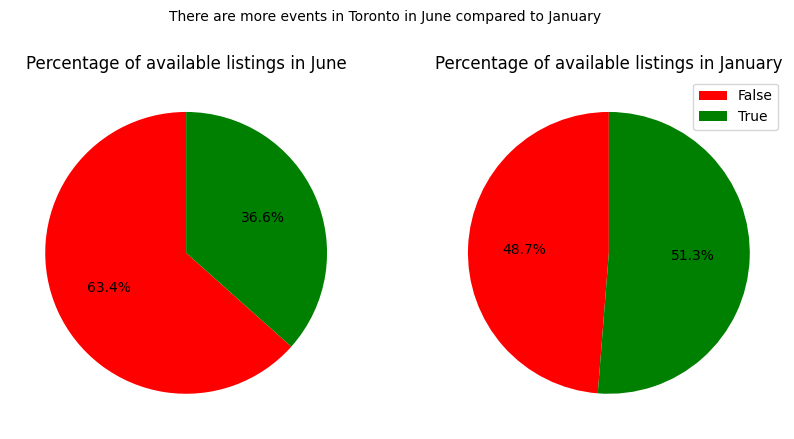

In [110]:
# plot the pie chart
fig, ax = plt.subplots(1, 2, figsize=[10,6])

ft_labels = ['red', 'green']

ax[0].pie(june_prop, autopct='%1.1f%%', startangle=90, colors=ft_labels);
ax[0].set_title('Percentage of available listings in June')

ax[1].pie(jan_prop, autopct='%1.1f%%', startangle=90, colors=ft_labels);
ax[1].set_title('Percentage of available listings in January')  # Main title
plt.suptitle('There are more events in Toronto in June compared to January', y=0.9, fontsize=10)
plt.legend(june_prop.index, loc='best');

##### Explanation
We can see that in June 2025 when many events have been scheduled, the percentage of still available listings is smaller compared to January 2025 when there are few events scheduled even though January is closer than June.

## Conclusion
In summary, our questions have definitely evolved from the guiding questions. We have been able to answer some, debunk some, and uncover new findings.

Our key findings are:
1. **Guiding question: What is the trade-off between price, amenities, and customer satisfaction in Airbnb listings? and As a business owner, what attributes do customers value the most, based on reviews?** There is no clear relationship between prices, amenities and customer ratings. However, reviews are generally positive and from the reviews,  it seems that customers are happy with the guest experience they get at a listing and the friendliness of the host. In fact, the negative reviews also highlight hosts and cleanliness as the reasons for those bad reviews. In essence, customers are more particular about their experience and relationship with the hosts.
2. **Guiding question: What is the trade-off between price, amenities, and customer satisfaction in Airbnb listings? and As a business owner, what attributes do customers value the most, based on reviews?** There is no clear relationship between prices, amenities and customer ratings. However, reviews are generally positive and from the reviews,  it seems that customers are happy with the guest experience they get at a listing and the friendliness of the host. In fact, the negative reviews also highlight hosts and cleanliness as the reasons for those bad reviews. In essence, customers are more particular about their experience and relationship with the hosts.
3. **Guiding question: How do local festivals and events in Toronto impact Airbnb demand and pricing trends?** During holidays, there are less available listings than otherwise. During local events and during the summer months, availability decreases implying that the availability trends could be related to annual and local festive events in Toronto.
4. **New question: What types of Airbnb listings are most commonly available to customers in Toronto?** Majority of the hosts list their entire homes or apartments on Airbnb; few of them list private rooms and even fewer list shared rooms.
5. **New question: In which neighborhoods in Toronto do customers have the highest likelihood of finding available Airbnb listings?** Waterfront Communities - the Island neighborhood is oversaturated with AirBnB listings. Customers who are not restricted a certain location will find many options here. However, the neighborhood is also generally expensive. Another neighborhood with many listings and more affordable prices is the Kesington-Chinatown neighborhood. Customers will find several more affordable options here.
6. **New question: Which neighborhoods in Toronto offer Airbnb hosts the highest profit margins?** For hosts, they can offer listings in Waterfront Communities - the Island for a high price and gain more profit. However, this neighbourhood comes with a lot of competition. As a host, if you want a good profit margin with lesser competition, you can consider listing in the Bridle Path-Sunnybrook-York Mills neighbourhood as there will be less competition and you can still list it for a high-end price. It is still important to back up this analysis with market research on the neighborhood.
7.  **Guiding question: What neighbourhoods in Toronto offer the best value for money in terms of price and review score?** Review scores were generally positive for all listings so it is not a major factor in discovering neighbourhoods that offer the best value for money.  However, in terms of price, this question is answered in question 5.
8. Average prices for Airbnb listings in Toronto are expected to be stable so customers can plan ahead without worrying about price inflation, at least for the next one year.
9. The dataset available does not provide answers to the following guiding questions:
    - Is there a relationship between the number of listings a host has and their reviews?
    - Are there any seasonal trends in the number of customer reviews on Airbnb?
    - What neighbourhoods in Toronto offer the best value for money in terms of price and review score?
   

### Interactive visualization of our data analysis

Finally, we have created an interactive visualization of our data analysis using a sample of 5,000 out of almost 22,000 listings. With the entire data, the interactive viz takes ~5 minutes to load so for efficiency's sake, we sampled information from 5,000 listings. We hosted this on a free web application and it can be accessed **[here](https://toronto-airbnb-l5.streamlit.app/).** You can explore the analysis, drill down to individual neighbourhoods and explore availability for different months and dates (streamlit n.d.; Pydeck n.d.).


## Next Steps/Recommendations

There are a few roadblocks we encountered during this analysis particularly related to analysing unstructured and open-ended data for amenities and reviews. We recommend the following:

1. For amenities, it will be more efficient for Airbnb to create standardized selections for hosts to use when creating a listing and informing the public on the amenities they have. Data validation approaches should also be used to make this data as clean as possible.
2. For the reviews written in foreign languages, we can use a translator to translate them to a consistent language for analysis. This will also depend on the compute resources available for the task, so perhaps doing this on the cloud will be perferrable although we will need to consider cost of compute resources. Additionally, we would use NLTK or a similar library to remove words that are not valuable to our analysis.

## Responses to questions from the rubric

**1. How did the presentations or other feedback you received affected the process?**

The presentations allowed outsiders to ask investigative questions, which was tremendously helpful. We incorporated these questions into our project to address pressing concerns about the Airbnb market. Some of these valuable insights we added to our presentation include:
- examining how local festivals and events in Toronto impact Airbnb demand and pricing trends; and 
- including a map to visually represent the data related to our analysis.

**2. What were the major contributions of each team member?**
The major contributions of each team member apart from the roles stated in the Team Contract include:
- **Eisha Chaudhry:** inspected, cleaned and performed the EDA on the *Calendar* dataset.
- **Itunuoluwa Olowoye:** inspected, cleaned and performed the EDA on the *Events* dataset, and created the interactive map.
- **Vrinda:** inspected, cleaned and performed the EDA on the *Listings* dataset.
- **Guanghan Tong:** inspected, cleaned and performed the EDA on the *Listings* dataset.
- **Michael-Lee Wilson:** inspected, cleaned and performed the EDA on the *Reviews* dataset.

**3. Finally, what would you want to do or learn next with this dataset?**

For the next steps with this dataset, the team is considering predictive modeling to forecast future trends in the Airbnb market. We could do this by exploring time series analysis to predict pricing trends, and occupancy rates.

**4. Are there new guiding questions you've thought of or something else you want to try?**

In the future we could incorporate real-time analysis. This would involve monitoring how listings respond to live market dynamics, such as seasonal fluctuations, major events, or any unexpected distruptions.

## References and AI Use
1.	Boyd, A. (2024, January 22). How many tourists visited Toronto last year? Report finds uptick, but city not yet back to pre-pandemic levels. The Star. https://www.thestar.com/business/how-many-tourists-visited-toronto-last-year-report-finds-uptick-but-city-not-yet-back/article_09531024-b7d1-11ee-9deb-838eb51041b3.html
2.	City of Toronto. (n.d.). *Festivals & Events*.https://www.toronto.ca/explore-enjoy/festivals-events
3.	Creative Commons. (n.d.). Attribution 4.0 International Deed. https://creativecommons.org/licenses/by/4.0/
4.	Inside Airbnb. (2023). Toronto Airbnb data: A closer look at price and review scores. http://insideairbnb.com/
5.	Inside Airbnb. (n.d.-a). About. https://insideairbnb.com/about/
6.	Inside Airbnb. (n.d.-b). Get the data. https://insideairbnb.com/get-the-data/
7.  GeeksforGeeks. (n.d.). NLTK Sentiment Analysis Tutorial For Beginners. https://www.geeksforgeeks.org/nltk-sentiment-analysis-tutorial-for-beginners/
7.	Pydeck. (n.d.).*ScatterplotLayer*. https://deckgl.readthedocs.io/en/latest/gallery/scatterplot_layer.html
8.	Streamlit. (n.d.). *API reference*. Snowflake Inc. https://docs.streamlit.io/develop/api-reference#chart-elements
9.	Wikipedia. (n.d.). *Annual events in Toronto*. https://en.wikipedia.org/wiki/Annual_events_in_Toronto
10.	https://drive.google.com/file/d/1YCgSoY9XBzkb6XW--baISYTvHyvqlxgL/view?usp=drive_link . This link contains the list of events, their dates, and the websites we found them.
11.	Used Chat GPT Prompt: “How do I calculate and plot a rolling average for a time series dataset in Python using pandas and matplotlib?"
12.	Used Chat GPT Prompt: “codeblock to restart jupyter kernel in jupyter notebook and wait for restart to continue running other cells"
13.	ChatGPT. OpenAI language model. OpenAI, 2024. https://www.openai.com/chatgpt
(The author used ChatGPT, an AI language model developed by OpenAI, to assist in improving the clarity and phrasing of various sections of this document.)
